In [34]:
# 0. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt

<Figure size 640x480 with 0 Axes>

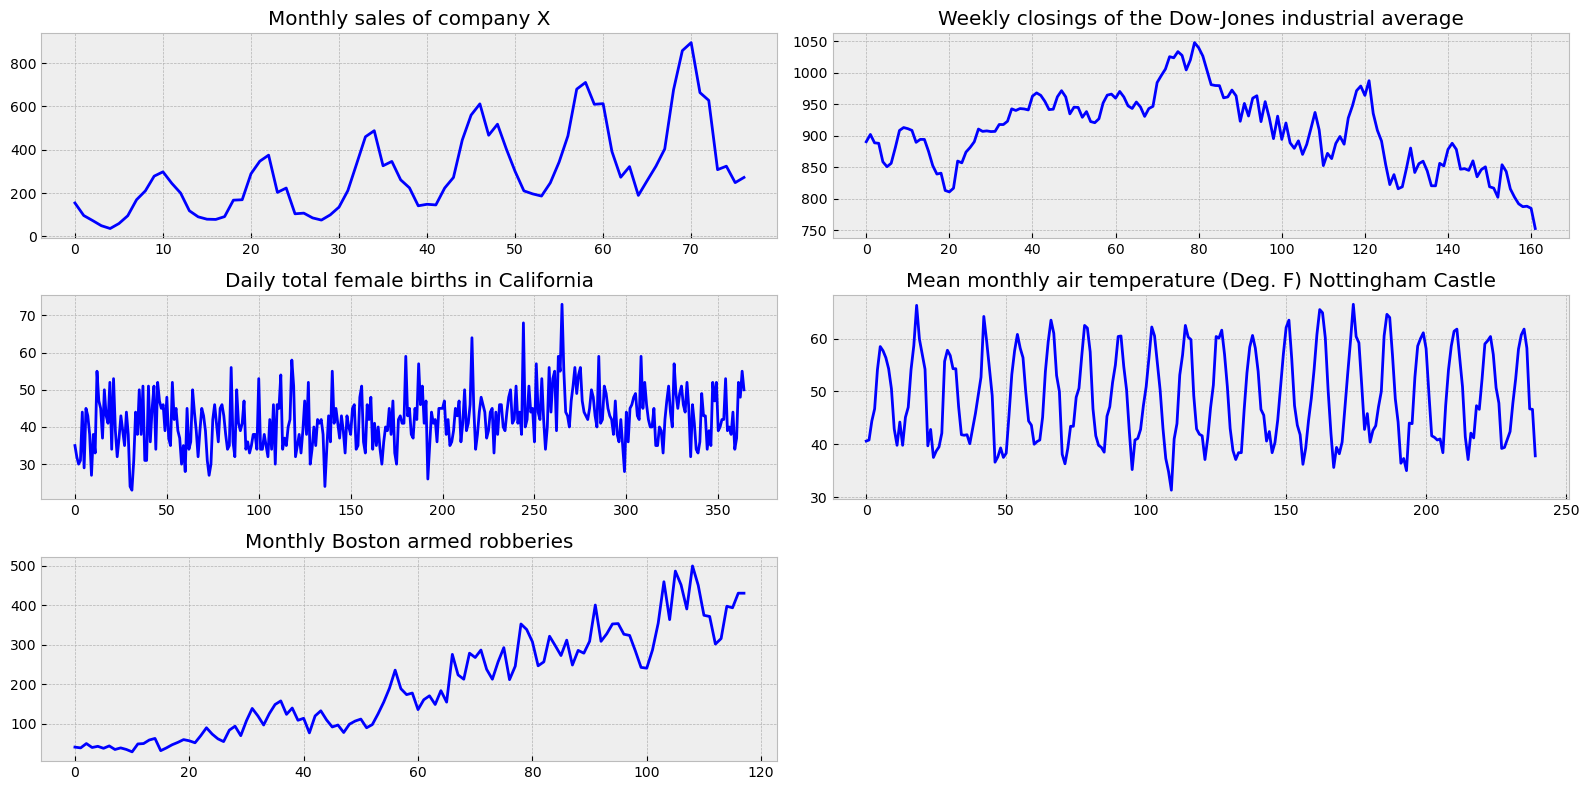

In [50]:
# 1. Init data
sales_of_company_x = pd.read_csv("Datasets/monthly_sales_of_company_x.csv") 
dowjones_closing = pd.read_csv("Datasets/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Datasets/daily-total-female-births-in-cal.csv")
mean_monthly_temp = pd.read_csv("Datasets/mean-monthly-air-temperature-deg.csv")
robberies_in_boston = pd.read_csv("Datasets/monthly-boston-armed-robberies-j.csv")


all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"]
}

with plt.style.context('bmh'):
    plt.clf()
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()
    plt.show()

In [14]:
# 2. Create helpers methods

# Dickey-Fuller Test
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Autocorrelation plot
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    plt.clf()
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
        plt.show()


# for defining the seasonality
def plot_ts_and_points(ts, start_point, step):
    plt.clf()
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')
        plt.show()

# 3.1. Monthly sales of company X

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


<Figure size 640x480 with 0 Axes>

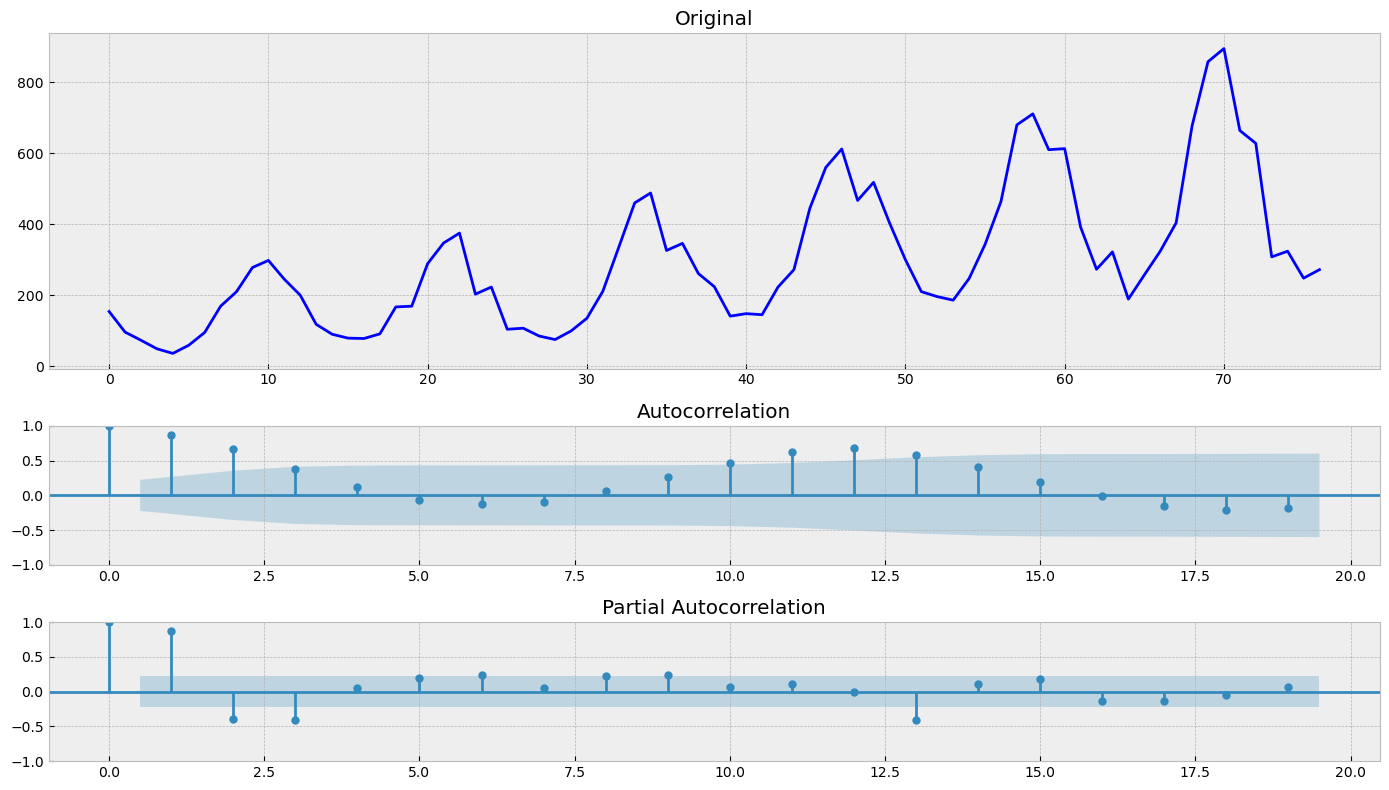

In [4]:
tsplot(all_series['Monthly sales of company X'])

<b> There is possible to conclude that "Monthly sales of company X"  is not stationary time series because:
1) Trend and seasonality are observed
2) The autocorrelation plot doesn't have the sharp decreasing
3) P-value from Dickey-Filler test equals 0.98 > 0.05 (=> not stationary)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


<Figure size 640x480 with 0 Axes>

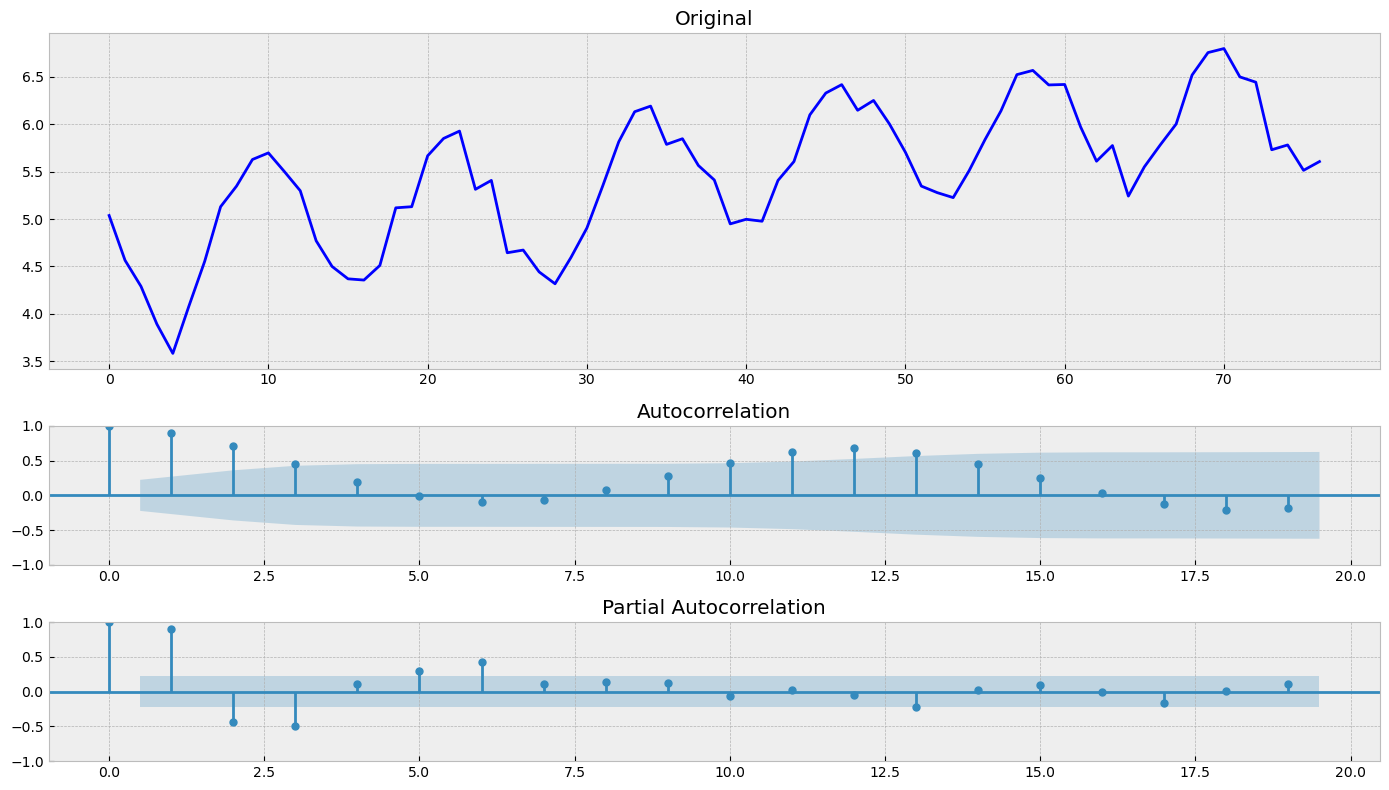

In [5]:
series = boxcox(
    x=all_series['Monthly sales of company X'], 
    lmbda=0,
    alpha=None
)
tsplot(series)

<b> The P-value has decreased and the dispersion has become more stable. But, anyway, the time series is also not stationary.

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


<Figure size 640x480 with 0 Axes>

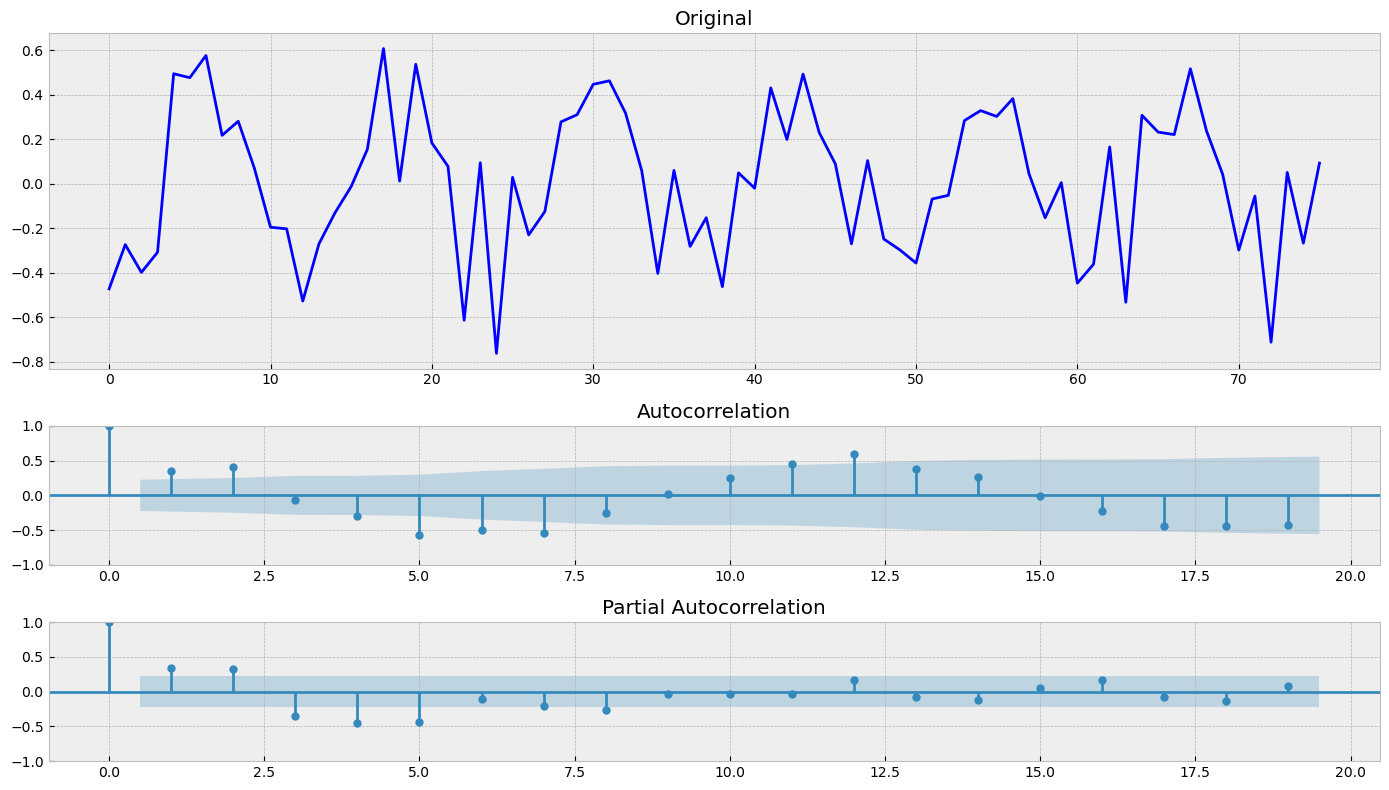

In [6]:
series_diff = np.diff(series, 1)
tsplot(series_diff)

<Figure size 640x480 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

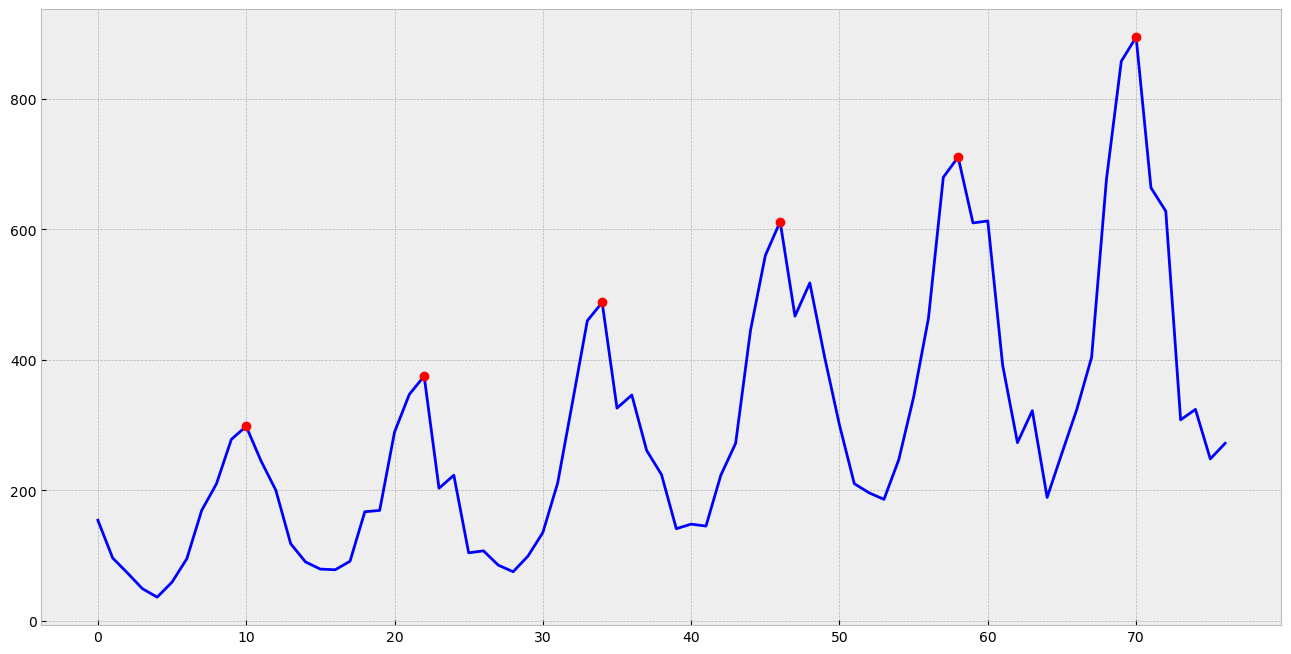

In [15]:
plot_ts_and_points(all_series['Monthly sales of company X'], 10, 12)

Results of Dickey-Fuller Test:
Test Statistic                -6.497446e+00
p-value                        1.184578e-08
#Lags Used                     1.100000e+01
Number of Observations Used    4.300000e+01
Critical Value (1%)           -3.592504e+00
Critical Value (5%)           -2.931550e+00
Critical Value (10%)          -2.604066e+00
dtype: float64


<Figure size 640x480 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

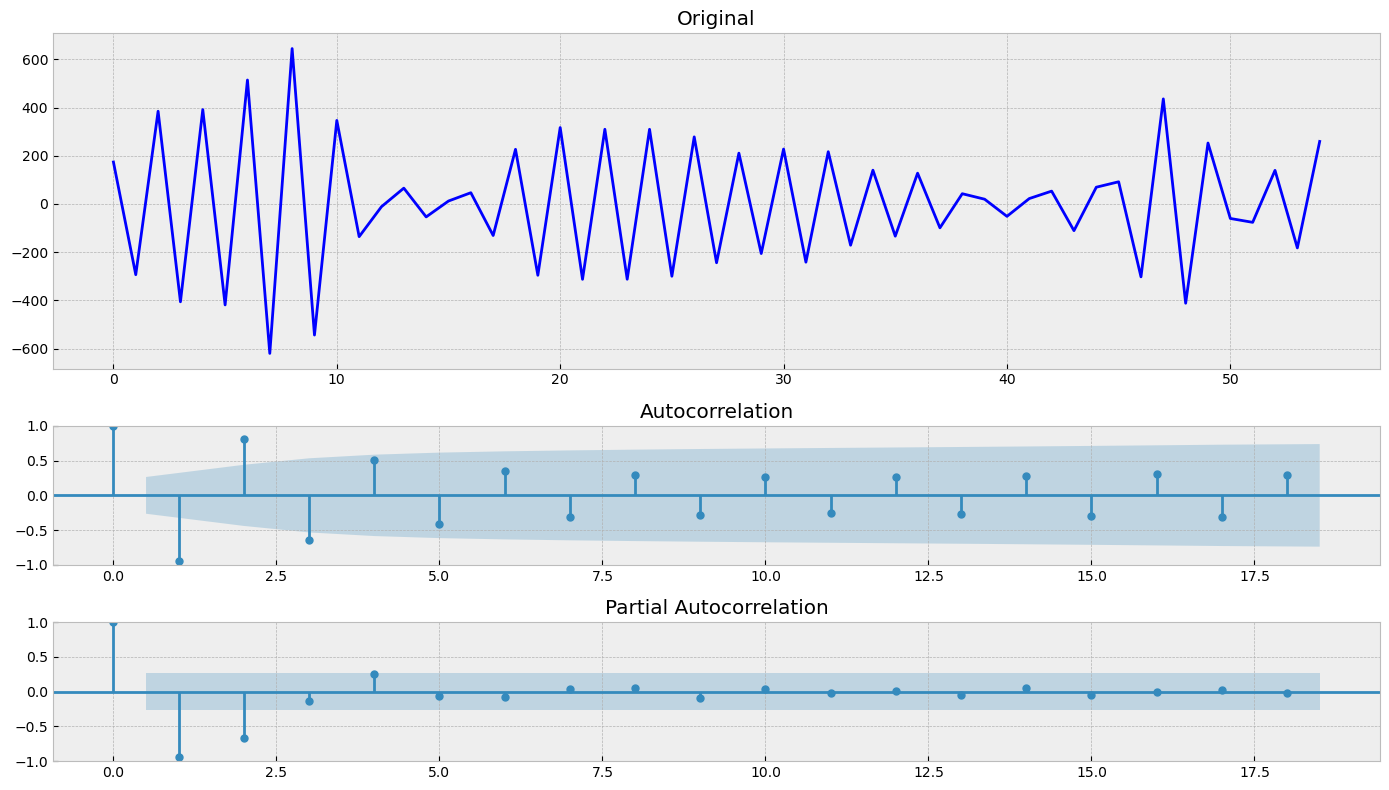

In [8]:
series_diff_seasonality = np.diff(series[10:], 12)
tsplot(series_diff_seasonality)

<b> Gotten the stationary time series using the BoxCox transformation and the derivation (with step 1 and 12 (seasonality)). Finally, we got the p-value almost equals zero, and we can see the sharp falling at the beginning of the autocorrelation plot.

# 3.2. Weekly closings of the Dow-Jones industrial average

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


<Figure size 640x480 with 0 Axes>

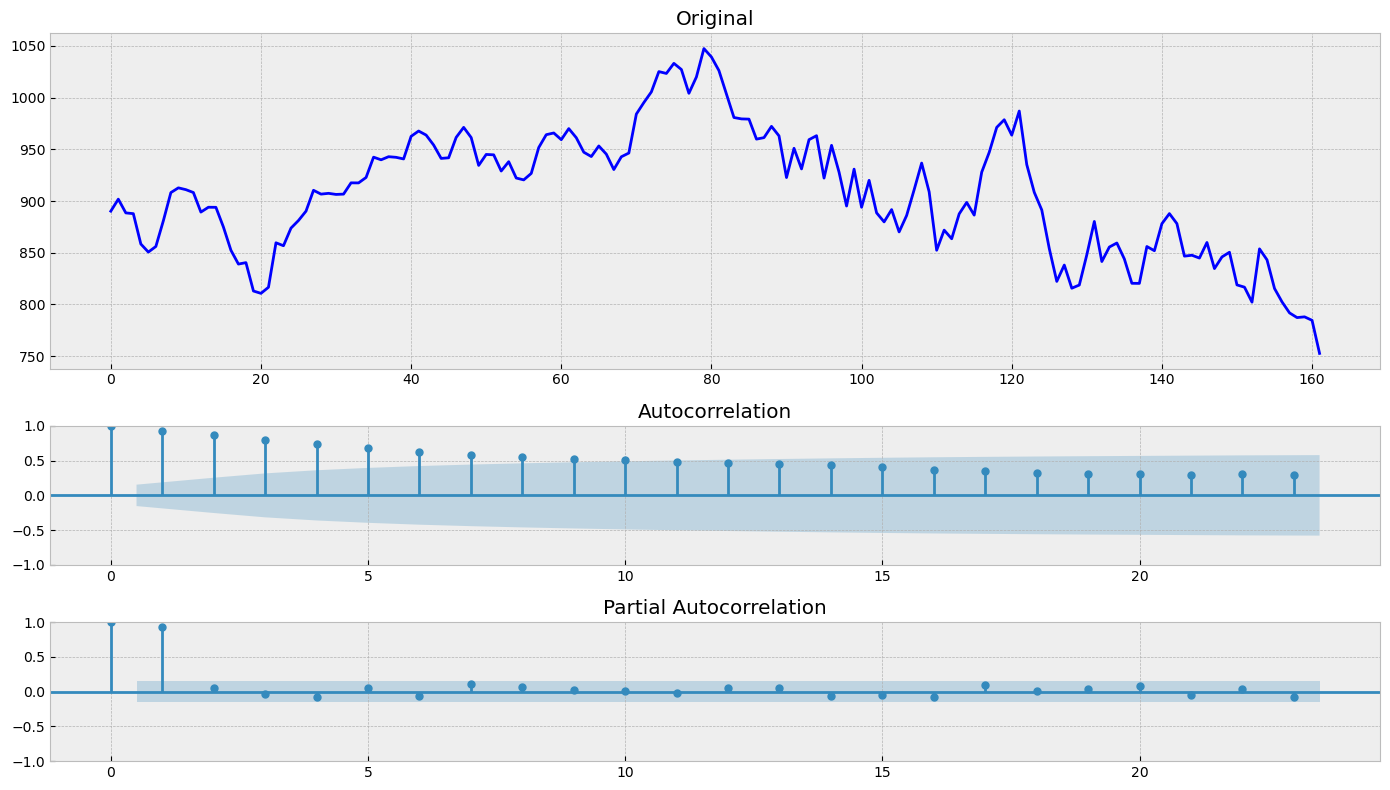

In [9]:
tsplot(all_series['Weekly closings of the Dow-Jones industrial average'])

<b> There is possible to conclude that "Weekly closings of the Dow-Jones industrial average" is not stationary time series because:

1) Trend and seasonality are observed
2) The autocorrelation plot doesn't have the sharp decreasing
3) P-value from Dickey-Filler test equals 0.62 > 0.05 (=> not stationary)

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


<Figure size 640x480 with 0 Axes>

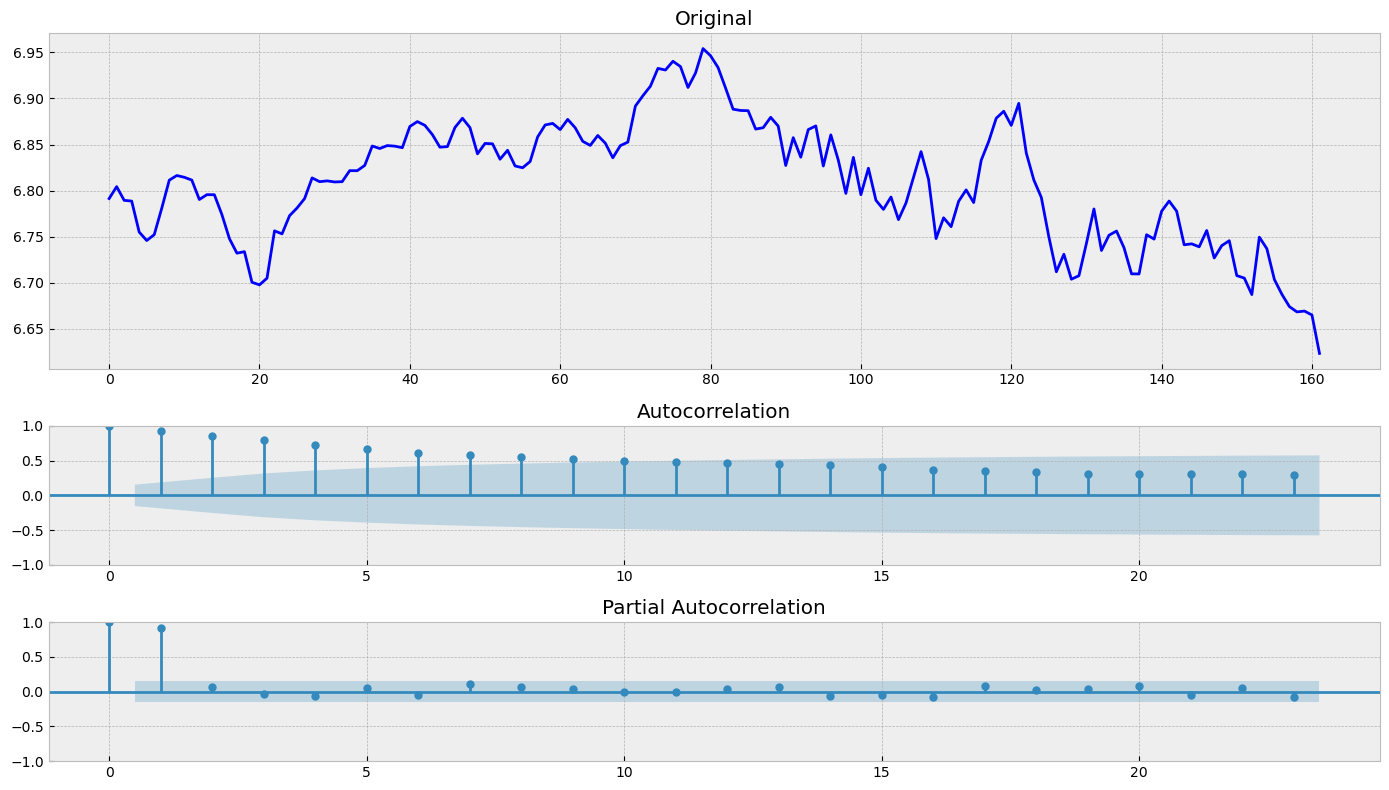

In [10]:
series = boxcox(
    x=all_series['Weekly closings of the Dow-Jones industrial average'], 
    lmbda=0,
    alpha=None
)
tsplot(series)

<b> The dispersion has become more stable, but the P-value has increased.

Results of Dickey-Fuller Test:
Test Statistic                  -1.409881
p-value                          0.577530
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


<Figure size 640x480 with 0 Axes>

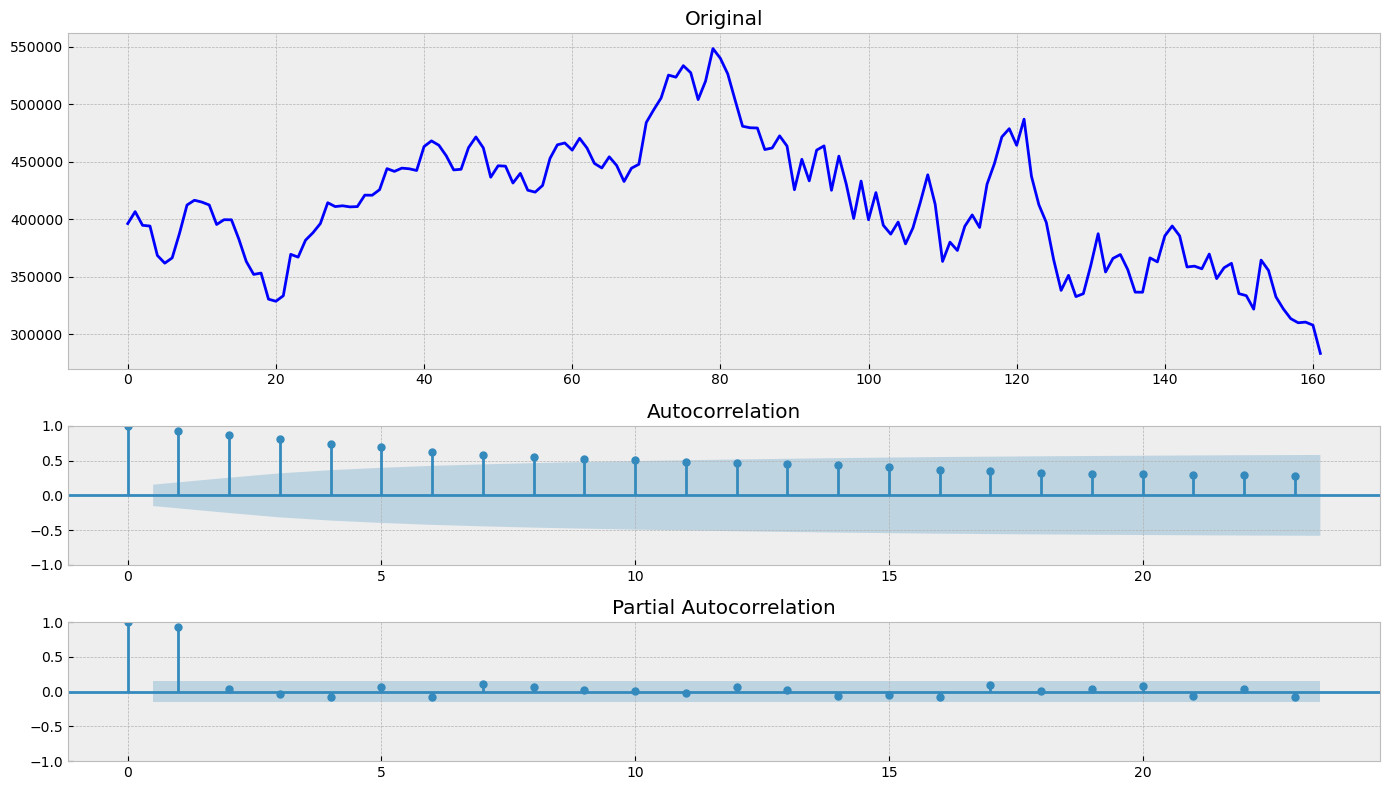

In [31]:
# Will try to use lmbda = 2 
series = boxcox(
    x=all_series['Weekly closings of the Dow-Jones industrial average'], 
    lmbda=2,
    alpha=None
)
tsplot(series)

<b> p-value is a bit better

Results of Dickey-Fuller Test:
Test Statistic                -1.303318e+01
p-value                        2.322150e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


<Figure size 640x480 with 0 Axes>

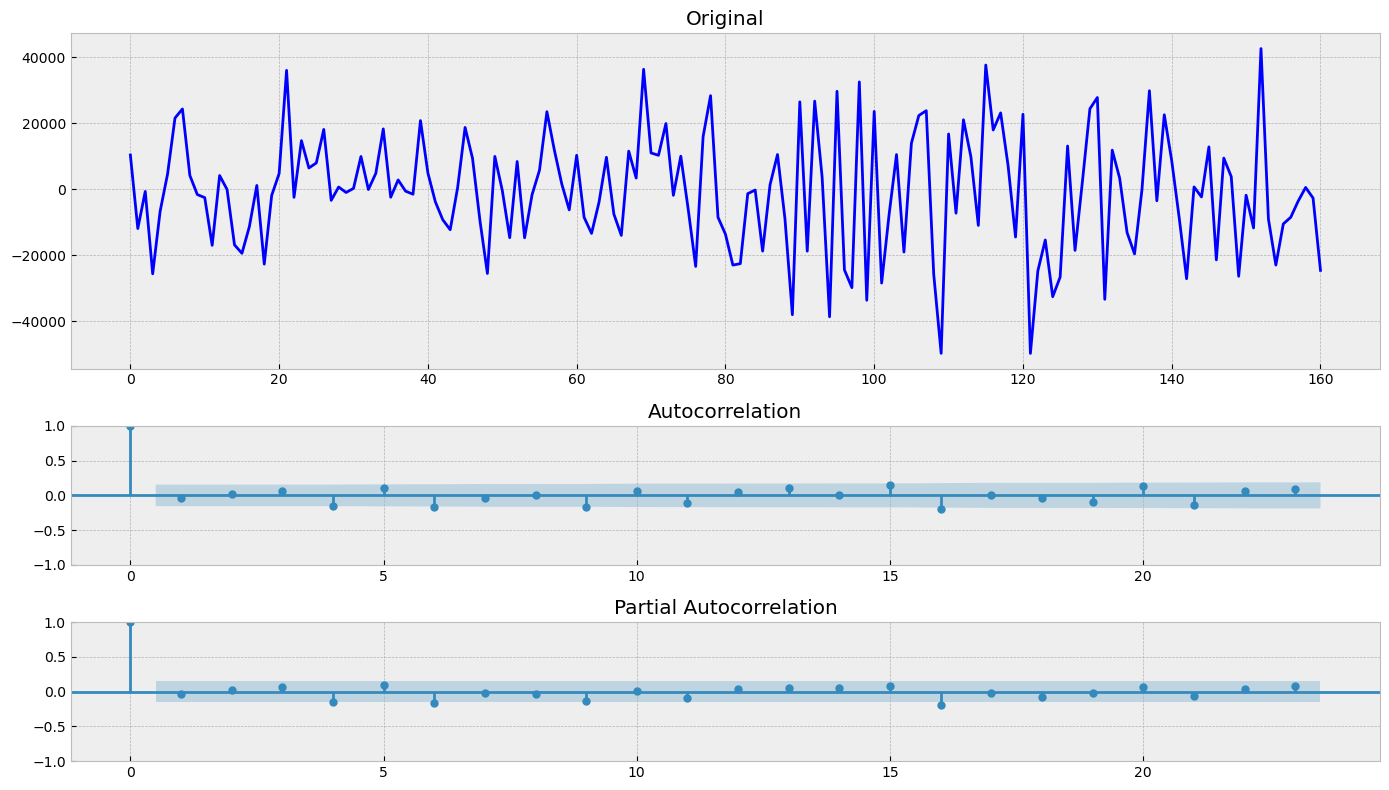

In [32]:
series_diff = series[1:] - series[:-1]
tsplot(series_diff)

<b> Gotten the stationary time series using the BoxCox transformation and the derivation (with step 1). Finally, we got the p-value almost equals zero, and we can see the sharp falling at the beginning of the autocorrelation plot.

# 3.3. Daily total female births in California

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


<Figure size 640x480 with 0 Axes>

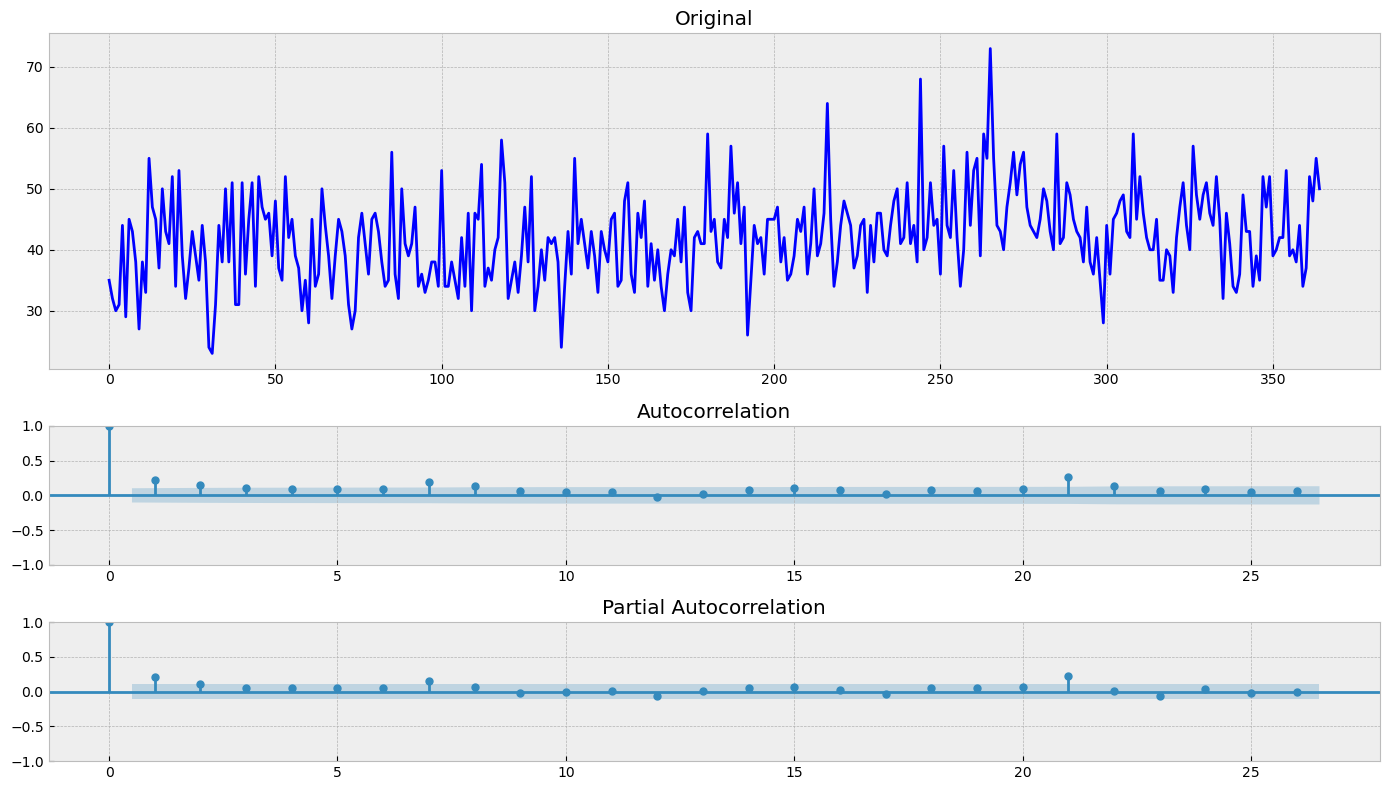

In [38]:
tsplot(all_series['Daily total female births in California'])

<b> This time series is already stationary

# 3.4. Mean monthly air temperature (Deg. F) Nottingham Castle

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


<Figure size 640x480 with 0 Axes>

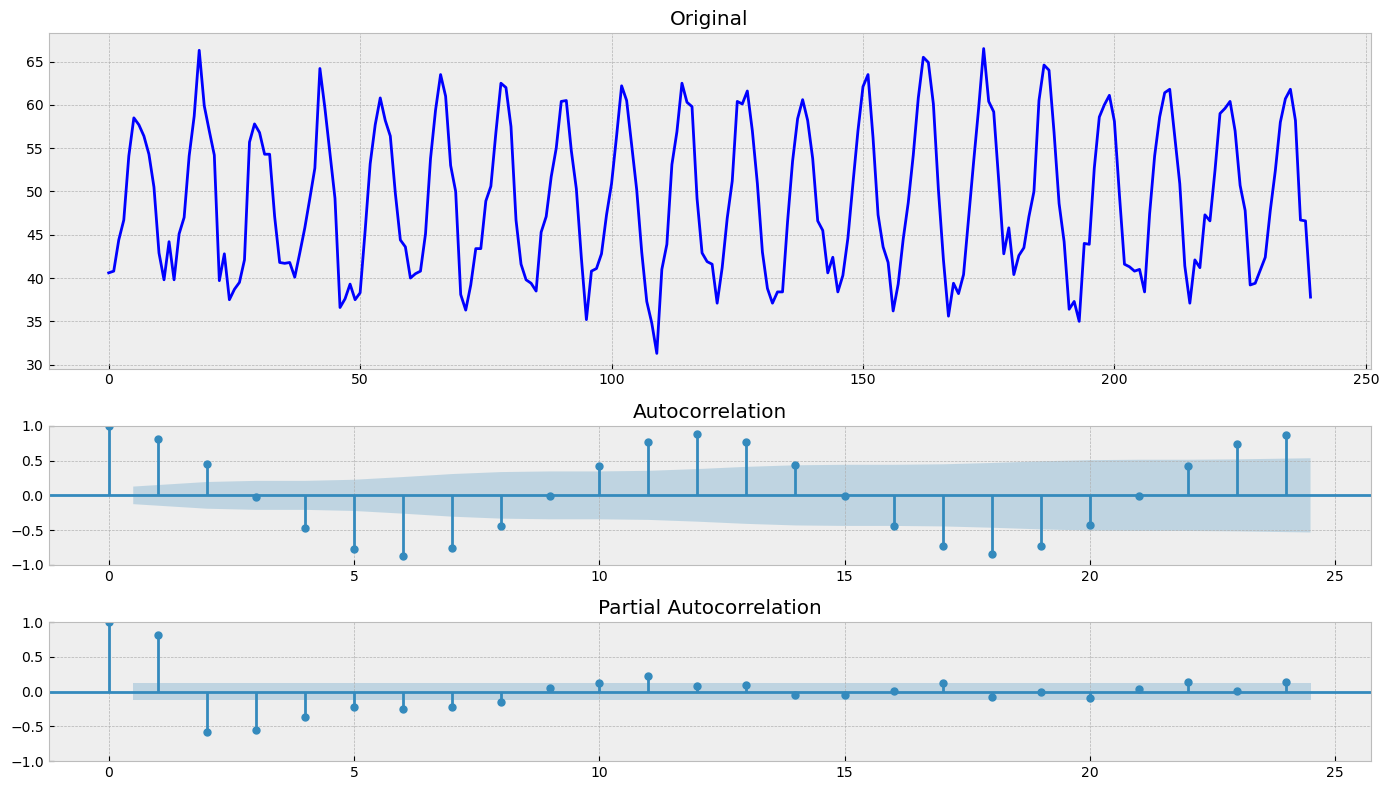

In [41]:
tsplot(all_series['Mean monthly air temperature (Deg. F) Nottingham Castle'])

<b> There is a low p-value, but there isn't a sharp fallen at the beginning of the autocorrelation plot.

Results of Dickey-Fuller Test:
Test Statistic                  -3.099153
p-value                          0.026616
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


<Figure size 640x480 with 0 Axes>

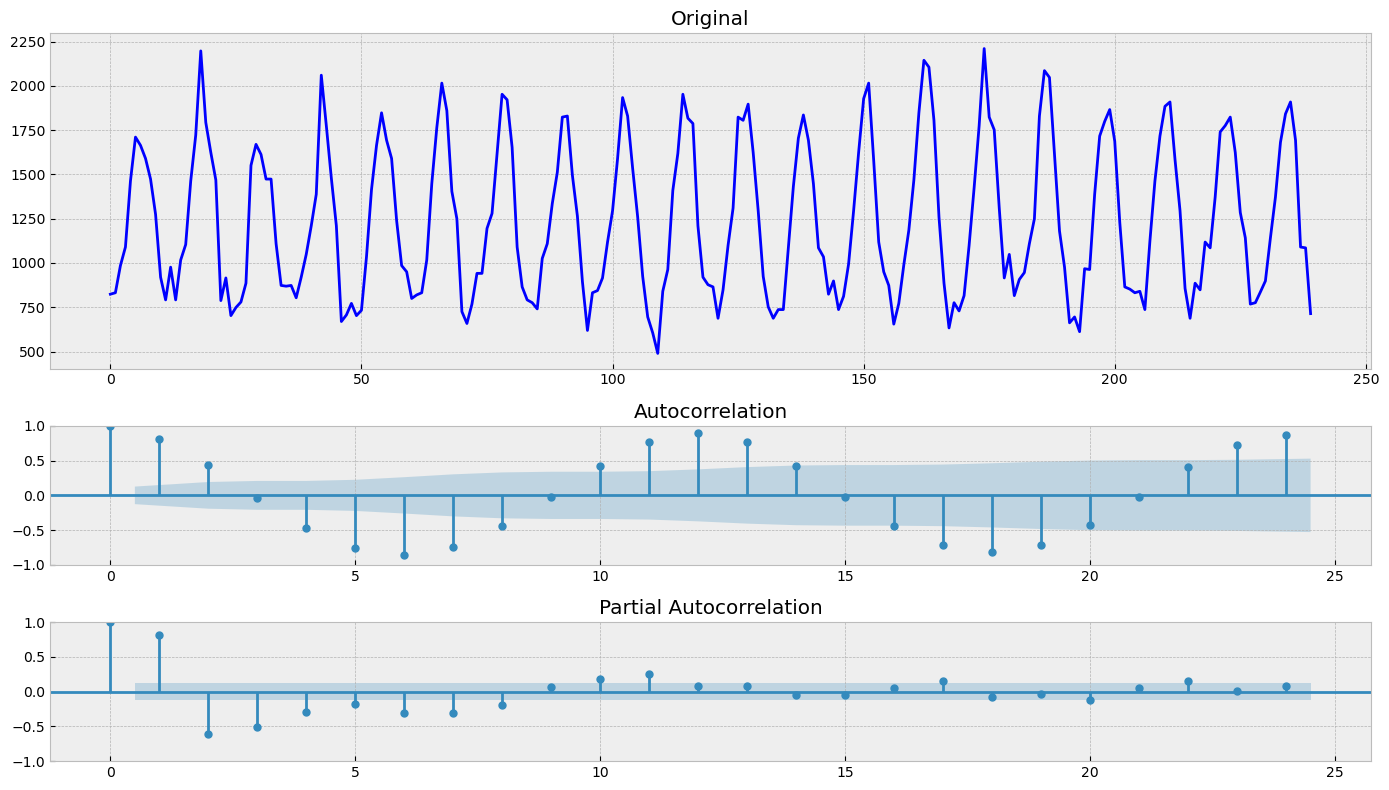

In [42]:
series = boxcox(
    x=all_series['Mean monthly air temperature (Deg. F) Nottingham Castle'], 
    lmbda=2,
    alpha=None
)
tsplot(series)

<b> The Boxcox transformation doesn't help significantly.

Results of Dickey-Fuller Test:
Test Statistic                -1.032164e+01
p-value                        2.998344e-18
#Lags Used                     1.500000e+01
Number of Observations Used    2.220000e+02
Critical Value (1%)           -3.460154e+00
Critical Value (5%)           -2.874649e+00
Critical Value (10%)          -2.573757e+00
dtype: float64


<Figure size 640x480 with 0 Axes>

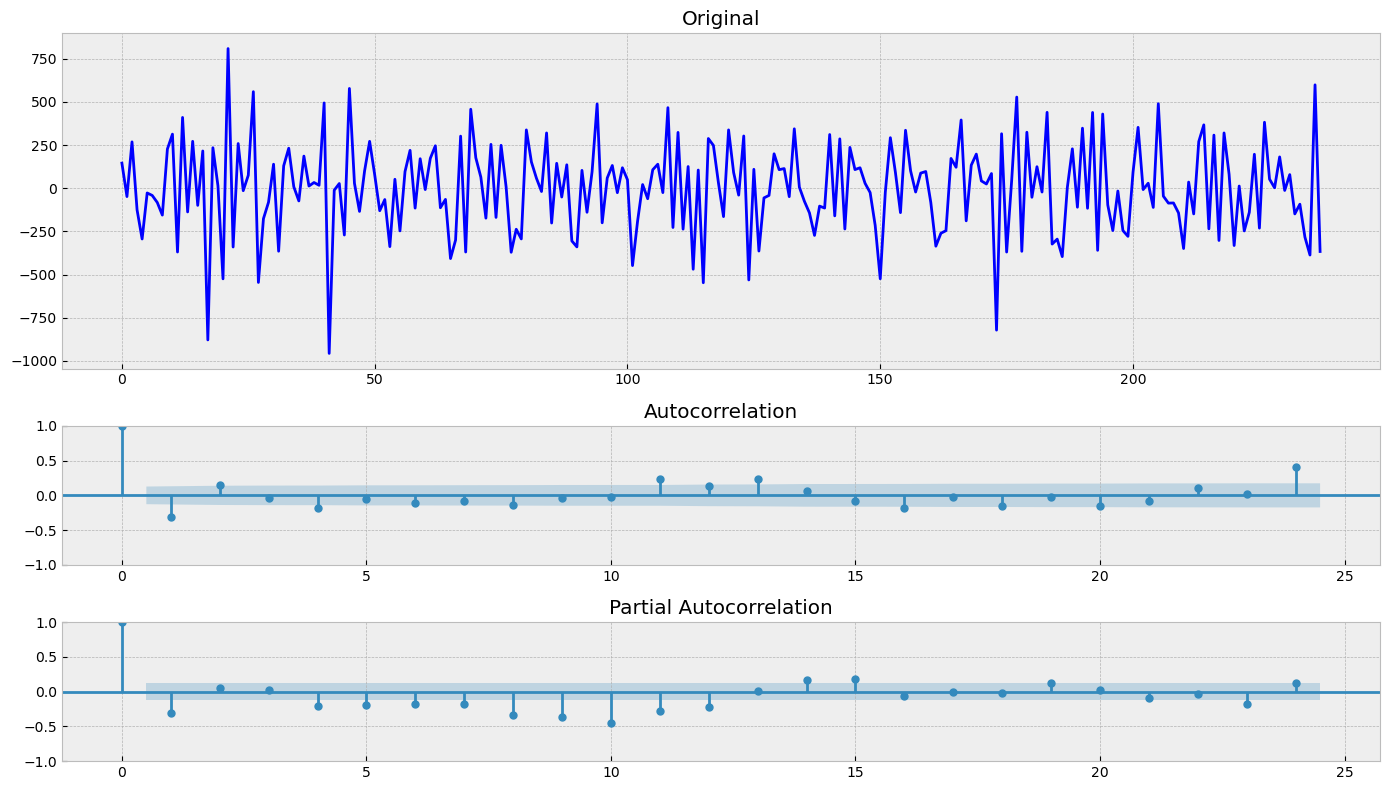

In [49]:
series_diff = np.diff(series, 2)
tsplot(series_diff)

<b> Gotten the stationary time series using the BoxCox transformation and the derivation (with step 2). Finally, we got the p-value almost equals zero, and we can see the sharp falling at the beginning of the autocorrelation plot.

# 3.4. Monthly Boston armed robberies

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


<Figure size 640x480 with 0 Axes>

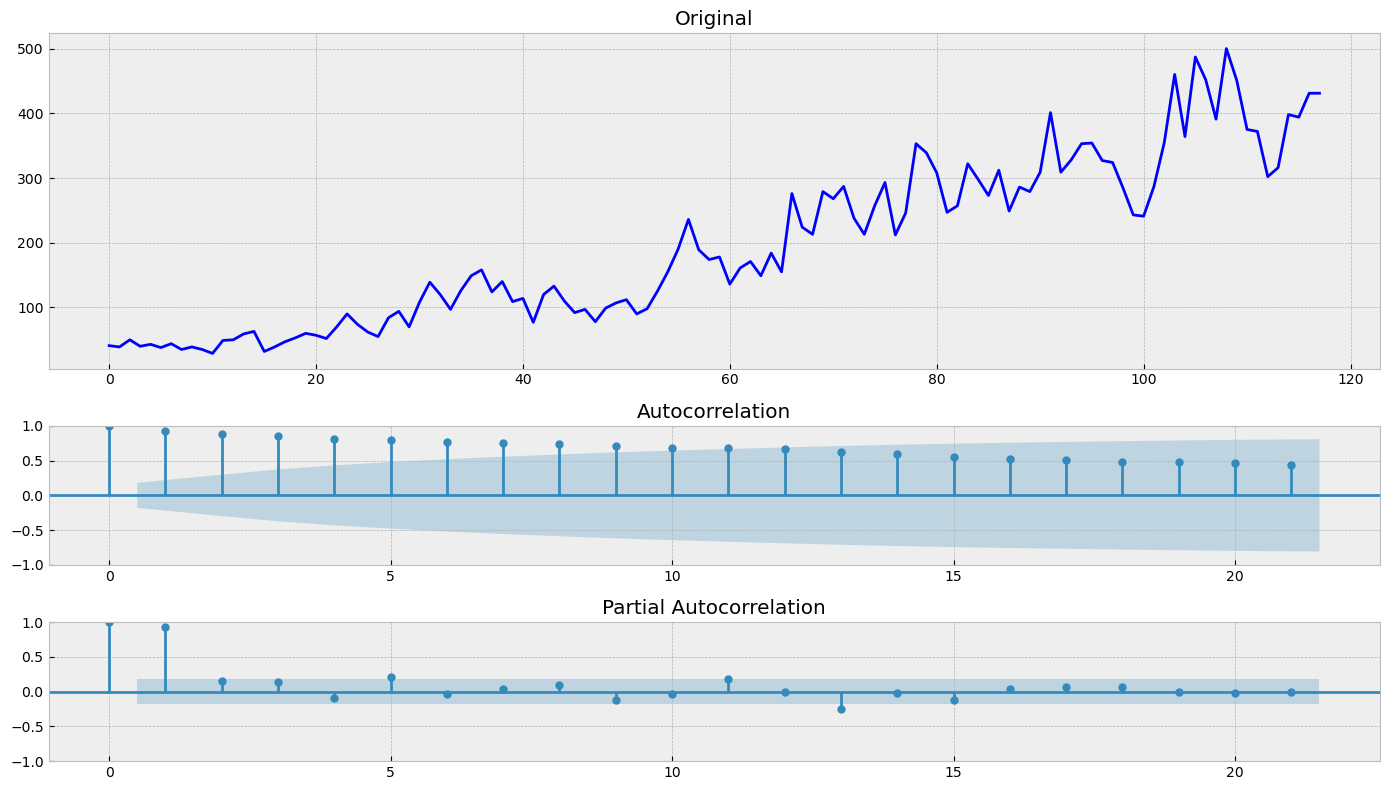

In [51]:
tsplot(all_series['Monthly Boston armed robberies'])

<b> There is possible to conclude that "Monthly sales of company X" is not stationary time series because:

1) Trend is observed
2) The autocorrelation plot doesn't have the sharp decreasing
3) P-value from Dickey-Filler test equals 0.98 > 0.05 (=> not stationary)

Results of Dickey-Fuller Test:
Test Statistic                  -3.760996
p-value                          0.003333
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


<Figure size 640x480 with 0 Axes>

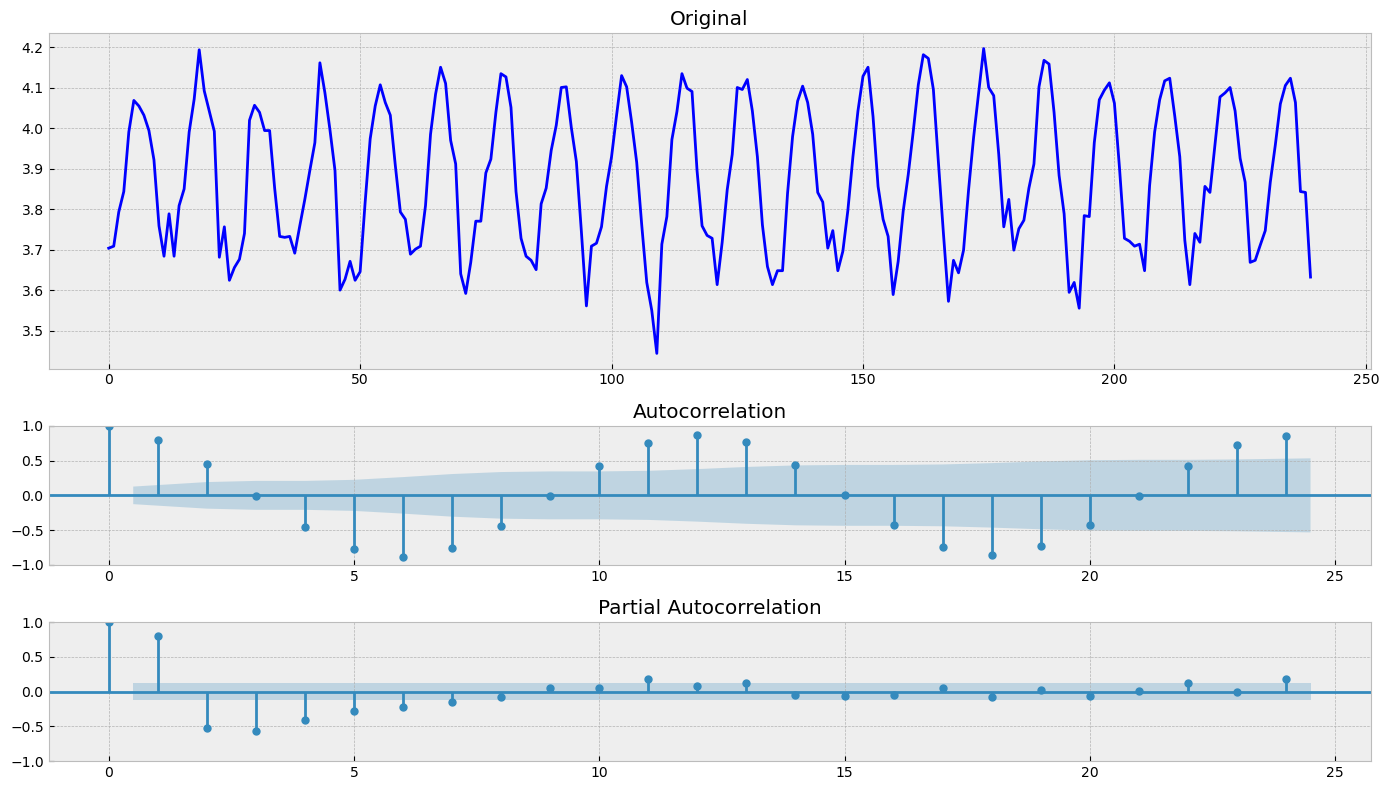

In [52]:
series = boxcox(
    x=all_series['Mean monthly air temperature (Deg. F) Nottingham Castle'], 
    lmbda=0,
    alpha=None
)
tsplot(series)

<b> There is a low p-value after the Boxcox transformation, but there isn't a sharp fallen at the beginning of the autocorrelation plot.

Results of Dickey-Fuller Test:
Test Statistic                -1.040810e+01
p-value                        1.834221e-18
#Lags Used                     1.500000e+01
Number of Observations Used    2.220000e+02
Critical Value (1%)           -3.460154e+00
Critical Value (5%)           -2.874649e+00
Critical Value (10%)          -2.573757e+00
dtype: float64


<Figure size 640x480 with 0 Axes>

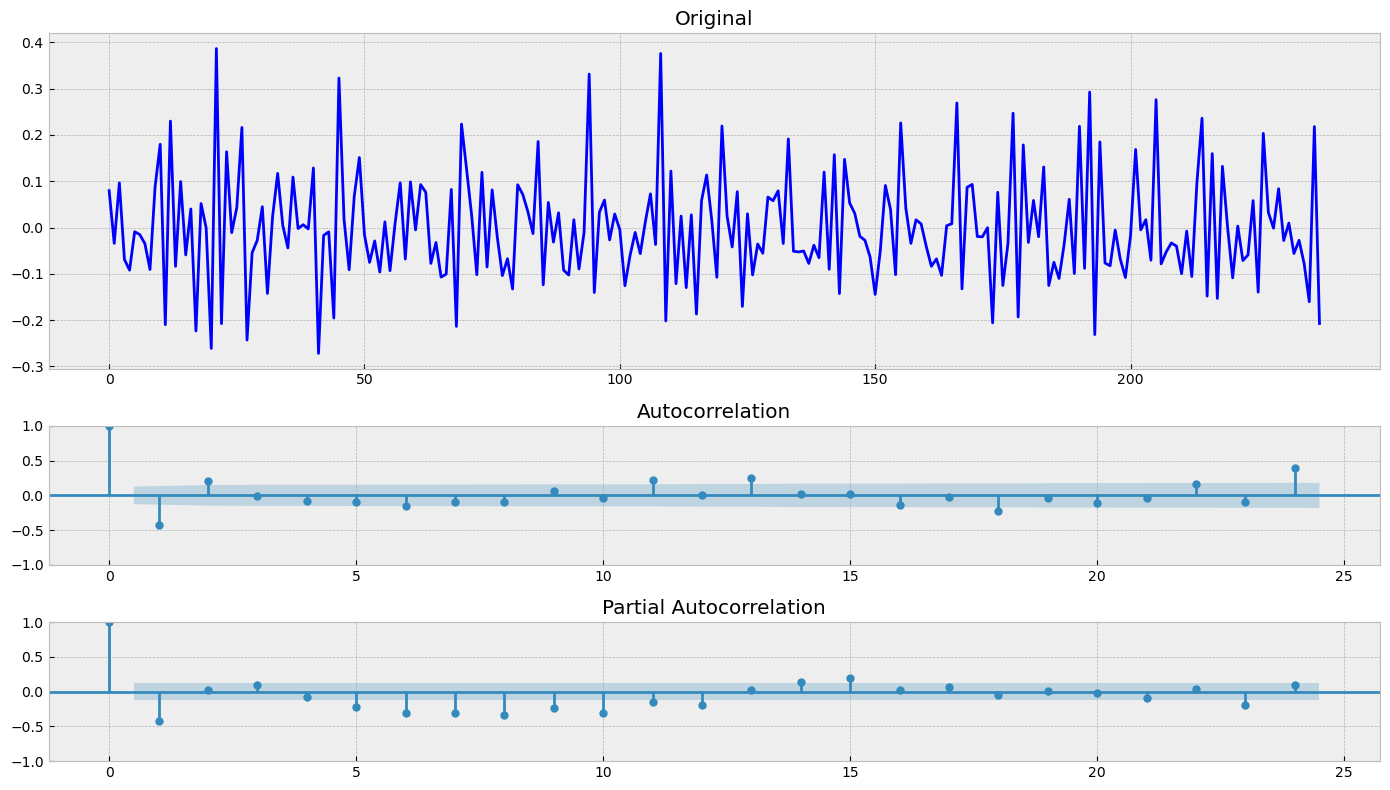

In [54]:
series_diff = np.diff(series, 2)
tsplot(series_diff)

<b> Gotten the stationary time series using the BoxCox transformation and the derivation (with step 1). Finally, we got the p-value almost equals zero, and we can see the sharp falling at the beginning of the autocorrelation plot.